We will now give an example of how to present data on a map.<br/>
Data can be points, lines, arrows, 2D fields... the principle is always the same:
* Create the projection.
* Plot using that projection.

The main package here is the [Basemap](http://matplotlib.org/basemap/) toolkit.

In [15]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
%matplotlib inline

In [16]:
mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})

# Setting up the map

The map use a [Mercator](http://matplotlib.org/basemap/users/merc.html) projection centered on southern Spain.<br/>
We add the coastline, fill the continents and label the meridians/parallels.<br/>
The resolution is set as *low* for the first tries. 

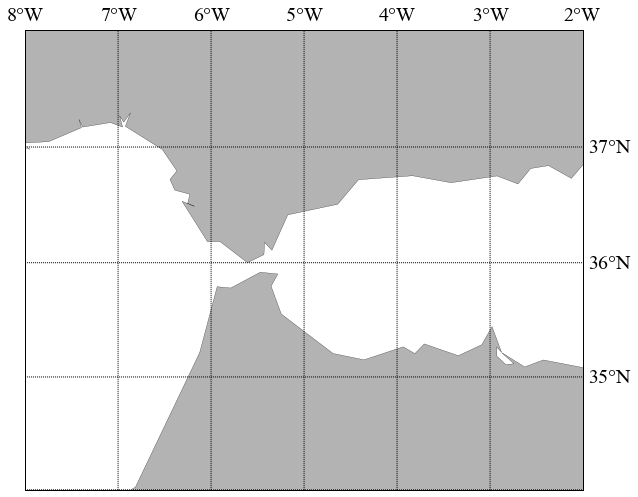

In [17]:
m = Basemap(projection='merc', llcrnrlat=34, urcrnrlat=38,\
            llcrnrlon=-8, urcrnrlon=-2, lat_ts=35, resolution='low')
plt.figure(figsize=(10,10))
m.drawcoastlines(linewidth=.25)
m.fillcontinents(color='.7')
m.drawparallels(np.arange(30.,40.,1.), labels=[False,True,True,False])
m.drawmeridians(np.arange(-10.,2.,1.), labels=[False,True,True,False])
plt.show()

Now on this map we want to add the location of Cádiz.<br/>
We could simply look for the coordinates, but let's try another solution using the [geopy](https://pypi.python.org/pypi/geopy) package. 

In [18]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode('Cadiz')
print location.address

Cádiz, Provincia de Cádiz, Andalucía, España


In [ ]:
loncadiz = location.longitude
latcadiz = location.latitude

Before adding the plot on the map, we have to compute the coordinates in the projection units.

In [21]:
loncadiz2, latcadiz2 = m(loncadiz, latcadiz)

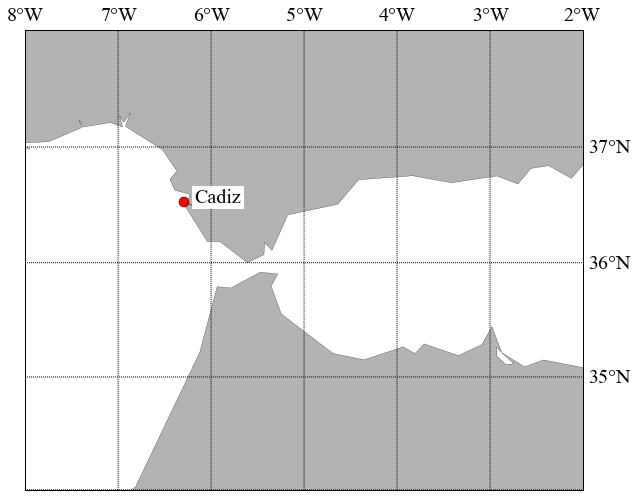

In [31]:
plt.figure(figsize=(10,10))
m.drawcoastlines(linewidth=.25)
m.fillcontinents(color='.7')
m.drawparallels(np.arange(30.,40.,1.), labels=[False,True,True,False])
m.drawmeridians(np.arange(-10.,2.,1.), labels=[False,True,True,False])
m.plot(loncadiz2, latcadiz2, 'ro', ms=10)
plt.text(loncadiz2+10000, latcadiz2, 'Cadiz', horizontalalignment='left', backgroundcolor='white')
plt.show()